In [26]:
import numpy as np
import pandas as pd

In [27]:
df = pd.read_csv("dirty_cafe_sales.csv")

df.head(5)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [29]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [30]:
df.isna().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [ ]:
#Measuring Completeness
df.replace(["ERROR","UNKNOWN",""], np.nan, inplace = True)

In [32]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [33]:
df.isna().sum()

Transaction ID         0
Item                 969
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

In [ ]:
#View affected rows
df[df.isna().any(axis=1)].head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
2,TXN_4271903,Cookie,4,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,NaN,NaN,2023-04-27
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,NaN,3,3.0,9.0,NaN,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,NaN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31
11,TXN_3051279,Sandwich,2,4.0,8.0,Credit Card,Takeaway,NaN
13,TXN_9437049,Cookie,5,1.0,5.0,NaN,Takeaway,2023-06-01
14,TXN_8915701,NaN,2,1.5,3.0,NaN,In-store,2023-03-21


In [35]:
numeric_columns = ["Quantity","Price Per Unit","Total Spent"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors = "coerce")

In [36]:
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors = "coerce")

In [37]:
df.dtypes

Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object

In [38]:
# Step 3.4: Create a validation flag
df['valid_total'] = np.isclose(df['Total Spent'], df['Quantity'] * df['Price Per Unit'], atol=0.01)

# Step 3.5: Count invalid totals
invalid_total_count = (~df['valid_total']).sum()
invalid_total_count


np.int64(1456)

In [39]:
placeholders = ["UNKNOWN", "ERROR", "", " ", None, np.nan]

In [40]:
#Compute completeness per column
completeness = df.notna().sum() / len(df) * 100
completeness = completeness.round(2)
completeness


Transaction ID      100.00
Item                 90.31
Quantity             95.21
Price Per Unit       94.67
Total Spent          94.98
Payment Method       68.22
Location             60.39
Transaction Date     95.40
valid_total         100.00
dtype: float64

In [41]:
# Compute Validity per Column
validity = {}
for col in df.columns:
    validity[col] = (~df[col].isin(placeholders)).sum() / len(df) * 100

validity = pd.Series(validity).round(2)
validity


Transaction ID      100.00
Item                 90.31
Quantity             95.21
Price Per Unit       94.67
Total Spent          94.98
Payment Method       68.22
Location             60.39
Transaction Date    100.00
valid_total         100.00
dtype: float64

In [42]:
#Compute Accuracy
accuracy_score = df["valid_total"].mean() * 100
accuracy_score = round(accuracy_score, 2)
accuracy_score


np.float64(85.44)

In [43]:
#Summary of the metrics
dq_summary = pd.DataFrame({
    "Completeness (%)": completeness,
    "Validity (%)": validity
})

# Add overall accuracy as a separate row
dq_summary.loc["Overall_Accuracy"] = [None, accuracy_score]
dq_summary


,Completeness (%),Validity (%)
Transaction ID,100.00,100.00
Item,90.31,90.31
Quantity,95.21,95.21
Price Per Unit,94.67,94.67
Total Spent,94.98,94.98
Payment Method,68.22,68.22
Location,60.39,60.39
Transaction Date,95.40,100.00
valid_total,100.00,100.00
Overall_Accuracy,NaN,85.44


In [44]:
# Define placeholder values again (just to be safe)
placeholders = ["UNKNOWN", "ERROR", "", " ", None, np.nan]

# Create a boolean column marking if a row has ANY issue
df["has_error"] = (
    df.isna().any(axis=1) |                          # Missing values
    df.isin(placeholders).any(axis=1) |              # Placeholder values
    (~df["valid_total"])                             # Wrong totals
)


In [45]:
error_rate = df["has_error"].mean() * 100
print(f"Overall Error Rate: {error_rate:.2f}%")


Overall Error Rate: 69.11%


In [46]:
error_by_location = df.groupby("Location")["has_error"].mean().sort_values(ascending=False) * 100
error_by_location


Location
In-store    48.889625
Takeaway    48.808736
Name: has_error, dtype: float64

In [47]:
error_by_payment = df.groupby("Payment Method")["has_error"].mean().sort_values(ascending=False) * 100
error_by_payment


Payment Method
Credit Card       55.917290
Cash              54.915855
Digital Wallet    53.339153
Name: has_error, dtype: float64

In [48]:
error_by_item = df.groupby("Item")["has_error"].mean().sort_values(ascending=False) * 100
error_by_item


Item
Smoothie    69.160584
Coffee      68.497854
Cake        66.198420
Tea         65.840220
Sandwich    65.428824
Cookie      64.194139
Salad       63.588850
Juice       63.535440
Name: has_error, dtype: float64

In [49]:
error_cluster = (
    df.groupby(["Location", "Payment Method"])["has_error"]
    .mean()
    .reset_index()
    .sort_values("has_error", ascending=False)
)
error_cluster.head(10)


,Location,Payment Method,has_error
3,Takeaway,Cash,0.268072
2,In-store,Digital Wallet,0.266187
1,In-store,Credit Card,0.265786
4,Takeaway,Credit Card,0.249626
5,Takeaway,Digital Wallet,0.248656
0,In-store,Cash,0.242165


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent style
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (8,5)


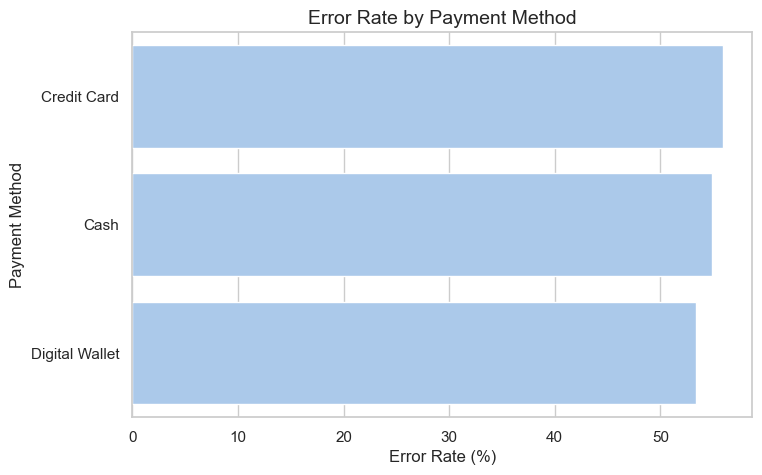

In [51]:
# Group and calculate error rates
error_by_payment = df.groupby("Payment Method")["has_error"].mean().sort_values(ascending=False) * 100

# Plot
plt.figure()
sns.barplot(x=error_by_payment.values, y=error_by_payment.index)
plt.title("Error Rate by Payment Method", fontsize=14)
plt.xlabel("Error Rate (%)")
plt.ylabel("Payment Method")
plt.show()


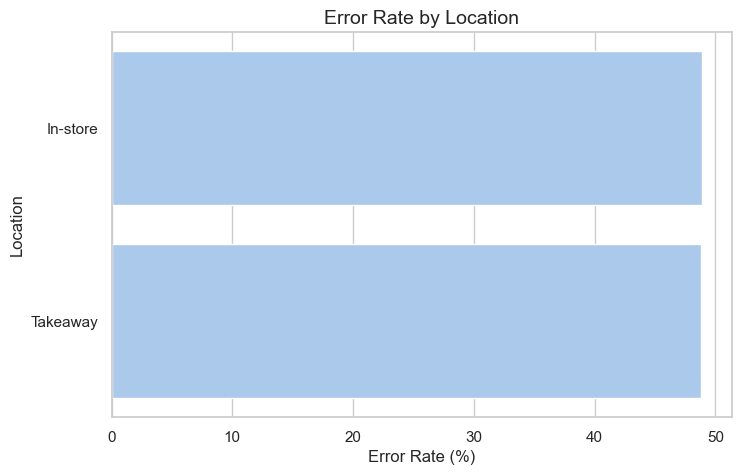

In [52]:
error_by_location = df.groupby("Location")["has_error"].mean().sort_values(ascending=False) * 100

plt.figure()
sns.barplot(x=error_by_location.values, y=error_by_location.index)
plt.title("Error Rate by Location", fontsize=14)
plt.xlabel("Error Rate (%)")
plt.ylabel("Location")
plt.show()


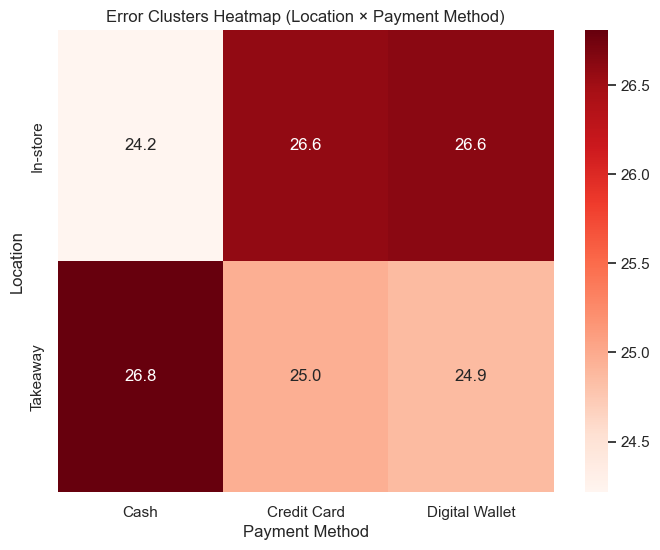

In [53]:
# Create pivot table for heatmap
error_pivot = df.pivot_table(values="has_error",
                             index="Location",
                             columns="Payment Method",
                             aggfunc="mean") * 100

plt.figure(figsize=(8,6))
sns.heatmap(error_pivot, annot=True, fmt=".1f", cmap="Reds")
plt.title("Error Clusters Heatmap (Location × Payment Method)")
plt.xlabel("Payment Method")
plt.ylabel("Location")
plt.show()


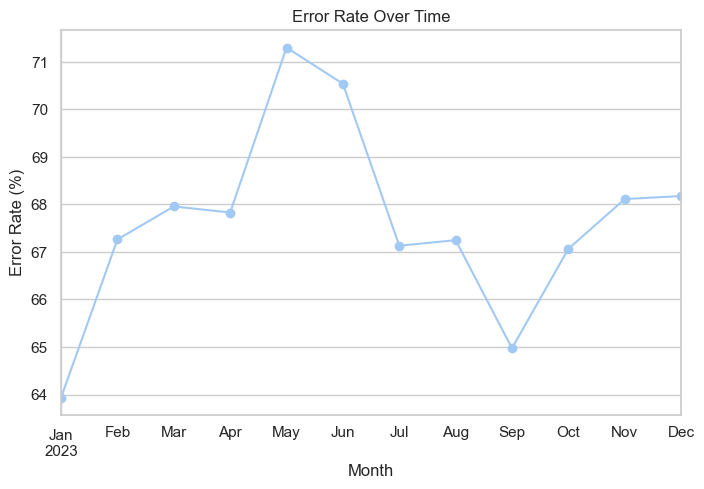

In [54]:
# Convert to monthly trend
df["Month"] = df["Transaction Date"].dt.to_period("M")
error_by_month = df.groupby("Month")["has_error"].mean() * 100

plt.figure()
error_by_month.plot(marker="o")
plt.title("Error Rate Over Time")
plt.xlabel("Month")
plt.ylabel("Error Rate (%)")
plt.grid(True)
plt.show()
